# Genetic Optimization Algorithm 

In [1]:
from random import *
import matplotlib.pyplot as plt

#### Define the Problem

In [2]:
def function(x):
    # x is a vector
    return sum([i**2 for i in x])

#### Define Hyperparameters

In [3]:
nGene = 5
geneMin = -10
geneMax = 10

nPop = 100
nCrossover = 70
nMutation = 20

nGeneration = 1000

# crossover hyperparameter
alpha = 0.5

In [4]:
class Particle:
    
    def __init__(self, genome=None):
        if genome:
            self.genome = genome
        else:
            self.genome = [uniform(geneMin,geneMax) for _ in range(nGene)]
        
        self.fitness = function(self.genome)
    
    
    def crossover(self,other):
        
        gamma = [uniform(-alpha,1+alpha) for _ in range(nGene)]
        
        offspring1 = []
        offspring2 = []
        
        for i,j,k in zip(self.genome, other.genome, gamma):
            t = k*i + (1-k)*j
            u = k*j + (1-k)*i
            
            offspring1.append(min(max(t,geneMin),geneMax))
            offspring2.append(min(max(u,geneMin),geneMax))
        
        child1 = Particle(offspring1)
        child2 = Particle(offspring2)
        
        return [child1, child2]
    
    def mutate(self):
        temp_genome = self.genome[:]
        i = choice(range(nGene))
        sigma = (geneMax - geneMin) / 10
        temp_genome[i] = min(max(temp_genome[i] + gauss(0, sigma), geneMin), geneMax)
        return Particle(temp_genome)

        
        
        

In [5]:
def sort_population(x):
    return sorted(x, key=lambda t: t.fitness)

### Stochastic Initialization

In [6]:
pop = [Particle() for _ in range(nPop)]

#### Main loop (Generations)

In [7]:
best_solution = []

for it in range(nGeneration):
    # random selection & crossover
    popc = []
    candidates = sample(pop, nCrossover)
    shuffle(candidates)
    
    for i in range(0,nCrossover,2):
        parent1 = candidates[i]
        parent2 = candidates[i+1]
        
        popc += parent1.crossover(parent2)
    
    
    # random selection & mutation
    popm = []
    candidates = sample(pop, nMutation)
    for i in candidates:
        popm.append(i.mutate())
    
    # merge & sort & truncate
    pop_overall = pop + popc + popm
    pop_overall = sort_population(pop_overall)
    pop = pop_overall[:nPop]
    
    # save best results & show information
    best_solution.append(pop[0])
    print (f"Generation {it}:\n Best Solution = {pop[0].fitness}\n Best Genome = {pop[0].genome}\n" + ('-'*40))
    
    

Generation 0:
 Best Solution = 12.024231656860778
 Best Genome = [-0.5181397755957828, -0.7320712722984197, -1.428818657467117, -2.7836081900892795, -1.1957579898221269]
----------------------------------------
Generation 1:
 Best Solution = 12.024231656860778
 Best Genome = [-0.5181397755957828, -0.7320712722984197, -1.428818657467117, -2.7836081900892795, -1.1957579898221269]
----------------------------------------
Generation 2:
 Best Solution = 7.141939768386763
 Best Genome = [-0.2908766818037855, 0.5243928404652746, 0.790144206151441, -2.225613944862036, -1.0975688475714405]
----------------------------------------
Generation 3:
 Best Solution = 4.134763316931752
 Best Genome = [1.0164961270117796, 0.36170274319691675, -0.22059245521413012, -1.536195387949949, -0.7497417988944842]
----------------------------------------
Generation 4:
 Best Solution = 4.134763316931752
 Best Genome = [1.0164961270117796, 0.36170274319691675, -0.22059245521413012, -1.536195387949949, -0.7497417988

----------------------------------------
Generation 410:
 Best Solution = 2.9664265547431906e-53
 Best Genome = [3.3720234267654613e-28, 3.997141113873567e-27, 1.2720546989616603e-27, 2.4924588091239667e-27, -2.396445069467864e-27]
----------------------------------------
Generation 411:
 Best Solution = 1.1659308136918567e-53
 Best Genome = [1.4669901916360243e-27, 3.578342953011733e-29, 2.402920723336453e-27, 6.24577725792422e-28, 1.8280706010812365e-27]
----------------------------------------
Generation 412:
 Best Solution = 1.1659308136918567e-53
 Best Genome = [1.4669901916360243e-27, 3.578342953011733e-29, 2.402920723336453e-27, 6.24577725792422e-28, 1.8280706010812365e-27]
----------------------------------------
Generation 413:
 Best Solution = 1.1659308136918567e-53
 Best Genome = [1.4669901916360243e-27, 3.578342953011733e-29, 2.402920723336453e-27, 6.24577725792422e-28, 1.8280706010812365e-27]
----------------------------------------
Generation 414:
 Best Solution = 7.28493

Generation 952:
 Best Solution = 3.831873714292618e-125
 Best Genome = [1.6511284852783876e-63, 3.116308097158622e-64, -2.2958643521249551e-63, 5.45188127094099e-63, -7.080929251652089e-64]
----------------------------------------
Generation 953:
 Best Solution = 3.142873006677962e-125
 Best Genome = [-3.5083295078534065e-63, -2.915087450448691e-63, -2.5787748585786765e-63, -1.4167894804707592e-63, -1.4018727061082137e-63]
----------------------------------------
Generation 954:
 Best Solution = 7.125604937353082e-126
 Best Genome = [1.1971078711223226e-63, 2.1158630418203526e-65, 3.917290982648708e-64, -2.2476041701229898e-63, 6.977920912615919e-64]
----------------------------------------
Generation 955:
 Best Solution = 7.125604937353082e-126
 Best Genome = [1.1971078711223226e-63, 2.1158630418203526e-65, 3.917290982648708e-64, -2.2476041701229898e-63, 6.977920912615919e-64]
----------------------------------------
Generation 956:
 Best Solution = 7.115401045680386e-126
 Best Genome

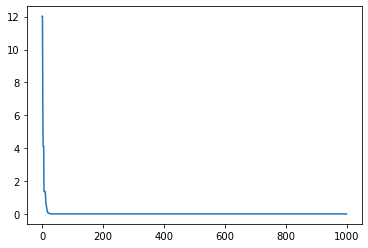

In [8]:
plt.plot([i.fitness for i in best_solution])
plt.show()